In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Define mean vector and covariance matrix
mu = np.array([3, 0])
cov = np.array([[1, 0.5], [0.5, 1]])

# Generate samples
np.random.seed(123)
n = 1000
samples = np.random.multivariate_normal(mu, cov, n)
x = samples[:, 0]
z = samples[:, 1]
y = 0.2 * x + z

# Save to CSV file
data = pd.DataFrame({'X': x, 'Y': y})
data.to_csv('data.csv', index=False)

# Calculate statistics
x_mean = np.mean(x)
x_std = np.std(x)
y_mean = np.mean(y)
y_std = np.std(y)
x_y_corr = np.corrcoef(x, y)[0, 1]

print('Sample X mean:', x_mean)
print('Sample X standard deviation:', x_std)
print('Sample Y mean:', y_mean)
print('Sample Y standard deviation:', y_std)
print('Sample X, Y correlation:', x_y_corr)

# Add constant term to X
X = sm.add_constant(x)

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Print summary of the model
print(model.summary())

t_value = model.tvalues[1]
p_value = model.pvalues[1]

print('Estimated beta_X:', model.params[1])
print('t-value of beta_X:', t_value)
print('p-value of t-test:', p_value)
print('R-squared:', model.rsquared)

Sample X mean: 3.0243339871295767
Sample X standard deviation: 0.9895097664098199
Sample Y mean: 0.6219217058735214
Sample Y standard deviation: 1.0965932460033236
Sample X, Y correlation: 0.6427119225217693
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     702.4
Date:                Fri, 07 Apr 2023   Prob (F-statistic):          1.30e-117
Time:                        11:19:13   Log-Likelihood:                -1244.7
No. Observations:                1000   AIC:                             2493.
Df Residuals:                     998   BIC:                             2503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
  

In [8]:
results_table = pd.DataFrame({'Sample X mean': [x_mean], 
                              'Sample X standard deviation': [x_std], 
                              'Sample Y mean': [y_mean], 
                              'Sample Y standard deviation': [y_std], 
                              'Sample X, Y correlation': [x_y_corr]})

print(results_table)

   Sample X mean  Sample X standard deviation  Sample Y mean  \
0       2.995331                      0.97816       0.643581   

   Sample Y standard deviation  Sample X, Y correlation  
0                     1.088617                 0.612255  


In [16]:
# Create a dictionary with the statistics
stats_dict = {
    'Estimated beta_X': [model.params[1]],
     'R-squared': [model.rsquared],
    't-value of beta_X': [t_value],
    'p-value of t-test': [p_value]
}

# Create a DataFrame from the dictionary
stats_df = pd.DataFrame(stats_dict)

# Print the DataFrame
print(stats_df)

   Estimated beta_X  R-squared  t-value of beta_X  p-value of t-test
0          0.712265   0.413079          26.502794      1.303231e-117


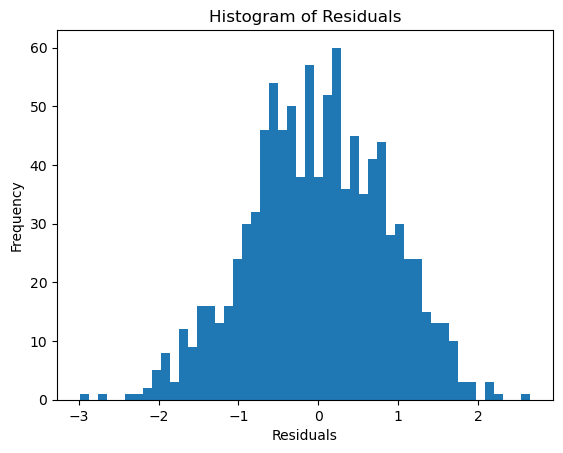

In [7]:
import matplotlib.pyplot as plt

# Plot histogram of residuals
residuals = model.resid
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


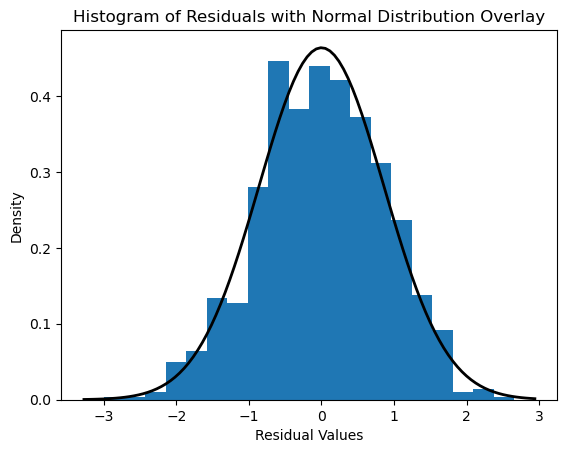

In [9]:
from scipy.stats import norm

# Plot histogram of residuals with overlay of normal distribution
plt.hist(residuals, bins=20, density=True)
plt.title('Histogram of Residuals with Normal Distribution Overlay')
plt.xlabel('Residual Values')
plt.ylabel('Density')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(residuals), np.std(residuals))
plt.plot(x, p, 'k', linewidth=2)
plt.show()

By superimposing a normal distribution on the histogram for comparison with the theoretical expectation, which represents the expected distribution of the residuals under the assumption that they follow a normal distribution, it was found to be consistent with the theory.